In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import pandas as pd
import geopandas as gpd
from rasterstats import zonal_stats



In [2]:


zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/united_states/clean_shp.shp"

values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/elevation/ELE.tif"

gdf = gpd.read_file(zones)

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [3]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m.a.s.l.) in US counties')

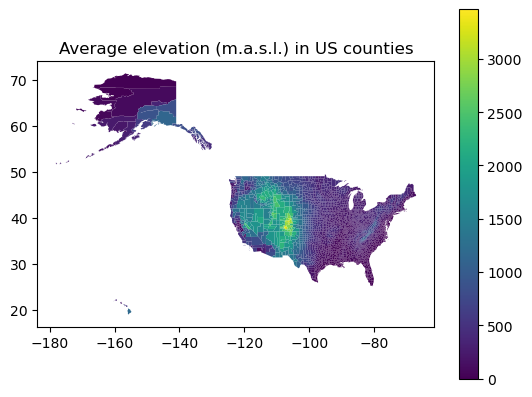

In [4]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m.a.s.l.) in US counties")

## Elevation

In [5]:
#zones = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/united_states/clean_shp.shp"

#gdf = gpd.read_file(zones)

In [6]:
us_shp = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/adm0_shp/united_states/UScounties.shp')
us_shp['FIPS'] = [x.replace('46113', '46102') for x in us_shp['FIPS']]



In [7]:
gdf = gdf.merge(us_shp, on='geometry')

## Coastal

In [8]:
coast = gpd.read_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/united_states/coastline.shp')

In [9]:
coast['location'] = coast['adm2'] + ', ' + coast['adm1']

In [10]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<Axes: >

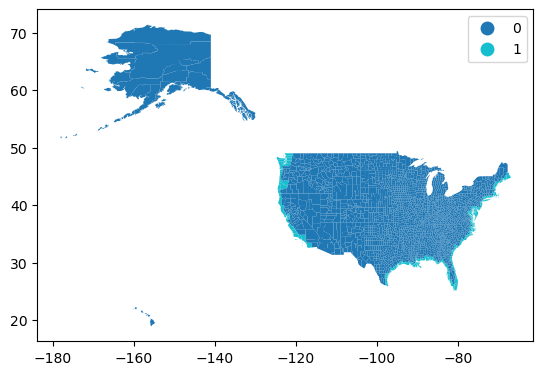

In [11]:
gdf.plot(column='coast', categorical= True, legend=True)

## Human Development Index

In [12]:
import pandas as pd

In [13]:
from unidecode import unidecode



In [14]:
hdi = pd.read_csv('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/demographic/united_states/GDL-Subnational-HDI-data-4.csv')

In [15]:
hdi.rename(columns={'2021':'HDI'}, inplace=True)

In [16]:
gdf = gdf.merge(hdi[['Region', 'HDI']], left_on='adm1', right_on='Region')

In [17]:
gdf

,adm2,adm1,location,geometry,mean_elev,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,coast,Region,HDI
0,Lake of the Woods,Minnesota,"Lake of the Woods, Minnesota","POLYGON ((-95.34283 48.54668, -95.34105 48.715...",345.740527,Lake of the Woods,Minnesota,27,077,27077,0,Minnesota,0.947
1,Ferry,Washington,"Ferry, Washington","POLYGON ((-118.85163 47.94956, -118.84846 48.4...",1003.445971,Ferry,Washington,53,019,53019,0,Washington,0.940
2,Stevens,Washington,"Stevens, Washington","POLYGON ((-117.43883 48.04412, -117.54219 48.0...",840.444997,Stevens,Washington,53,065,53065,0,Washington,0.940
3,Okanogan,Washington,"Okanogan, Washington","POLYGON ((-118.97209 47.93915, -118.97406 47.9...",1146.750416,Okanogan,Washington,53,047,53047,0,Washington,0.940
4,Pend Oreille,Washington,"Pend Oreille, Washington","POLYGON ((-117.43858 48.99992, -117.03205 48.9...",1057.754381,Pend Oreille,Washington,53,051,53051,0,Washington,0.940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,"Skagway-Hoonah-Angoon, Alaska","MULTIPOLYGON (((-137.80952 58.71648, -137.4674...",641.474726,Skagway-Hoonah-Angoon,Alaska,02,232,02232,0,Alaska,0.930
3137,Yukon-Koyukuk,Alaska,"Yukon-Koyukuk, Alaska","POLYGON ((-161.0477 62.20469, -160.99428 62.89...",83.680063,Yukon-Koyukuk,Alaska,02,290,02290,0,Alaska,0.930
3138,Southeast Fairbanks,Alaska,"Southeast Fairbanks, Alaska","POLYGON ((-146.96382 63.4607, -146.95735 64.25...",830.831160,Southeast Fairbanks,Alaska,02,240,02240,0,Alaska,0.930
3139,Denali,Alaska,"Denali, Alaska","POLYGON ((-152.98947 62.749, -152.48773 63.160...",827.892965,Denali,Alaska,02,068,02068,0,Alaska,0.930


Text(0.5, 1.0, 'State HDI United States')

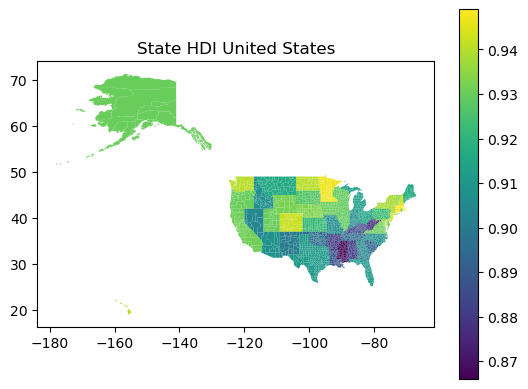

In [18]:
gdf.plot(column='HDI', legend=True)
plt.title('State HDI United States')

## Population density

In [19]:
#link: https://hub.worldpop.org/geodata/listing?id=77
values = "/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/USA/pop/usa_pop_2022_CN_1km_R2025A_UA_v1.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
gdf = gdf.join(stats)


In [20]:

# choose correct projection for country
gdf = gdf.to_crs("EPSG:5070") #NAD83 / Conus Albers (EPSG:5070)


#Manually calculate area
gdf['area'] = gdf.geometry.area / 1e6

#manually calculate population density
gdf['popdens'] = gdf['sum'] / gdf['area']

In [448]:
#gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

## Age

In [ ]:
gdf.to_crs(epsg=4326, inplace=True)

In [26]:
# use Global2 age data, summming over all total ages over 60 (deleting all other files in the folder)

gdf['over60_pop'] = 0
for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/USA/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']



#get total population in each adm2 region

for file in glob.glob('/Users/shivyucel/Documents/projects/DPhil/Code_Data/paper2_repo/__clean/Global2/USA/pop/*'):
    
    values = file
    
    pop_sum = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = pop_sum['sum']


gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

In [29]:
gdf[gdf['over60_propor'] == gdf['over60_propor'].max()]

,adm2,adm1,location,geometry,mean_elev,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,coast,Region,HDI,sum,area,popdens,over60_pop,pop_total,over60_propor
2873,Sumter,Florida,"Sumter, Florida","POLYGON ((-81.95083 28.95718, -81.95338 28.342...",28.790859,Sumter,Florida,12,119,12119,0,Florida,0.911,157904.71875,1498.488201,105.376017,110074.232056,157904.71875,0.697093


<Axes: >

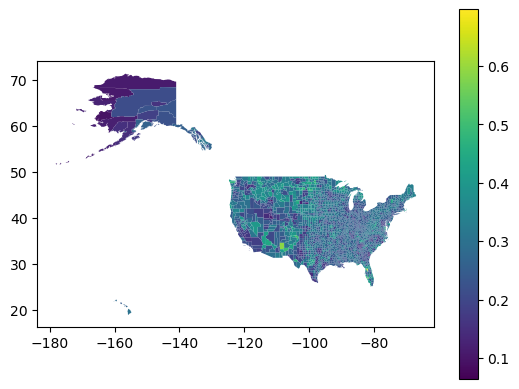

In [30]:
gdf.plot(column='over60_propor', legend=True)

In [31]:
HDI_subset = gdf.drop_duplicates('HDI')

In [32]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)

In [33]:
HDI_subset['HDI_dec'] = deciles

/Users/shivyucel/opt/anaconda3/envs/geo2/lib/python3.11/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [34]:
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')

In [35]:
gdf['popden_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

In [36]:
gdf = gdf[['adm2', 'adm1', 'location', 'geometry', 'FIPS', 'mean_elev', 'coast', 'HDI_dec', 'popden_dec', 'over60_dec']]

In [37]:
gdf.to_file('/Users/shivyucel/Documents/projects/DPhil/Code_Data/data/physical/united_states/merged_Global2.shp')